# Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sympy import *
from scipy import signal
from matplotlib import style

# Phase 01: Introduction 

## Signal Classification

### Continuous Vs Discrete Signals

| **Continuous-Time**          | **Discrete-Time**                   |
| ---------------------------- | ----------------------------------- |
| Defined for all time `t ∈ ℝ` | Only at specific time steps `n ∈ ℤ` |
| Think: analog                | Think: digital samples              |
| e.g. sin(t), voice, ECG      | e.g. sampled audio, image pixels    |


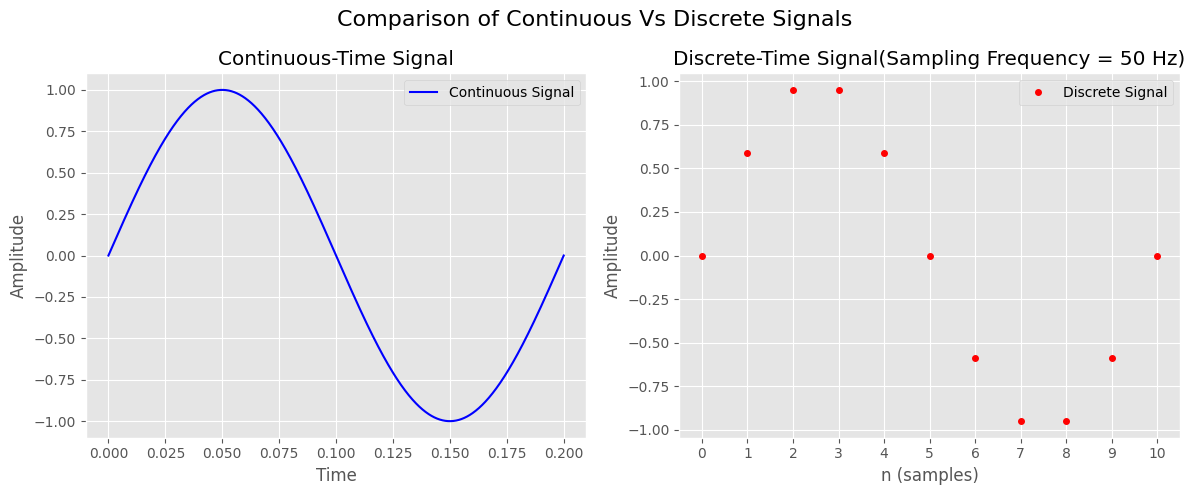

In [19]:
# period of the continuous signal
T = 1 / 5  # 5 Hz frequency

#continuous function definition
t = np.linspace(0,0.2, 1000)
x_ct = np.sin(2 * np.pi * t / T)

#discrete function definition

# if the sampling frequency is 50 Hz ; T/10 = 0.02 seconds
n_50 = np.arange(0,11)  # 10 samples
x_dt_50 = np.sin(2 * np.pi * 0.1 * n) 


#plot both signals

plt.figure(figsize=(12,5))


plt.subplot(1, 2, 1)
plt.plot(t, x_ct, label='Continuous Signal', color='blue')
plt.title('Continuous-Time Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(n_50, x_dt_50, 'ro', label='Discrete Signal', markersize=4)
plt.title('Discrete-Time Signal(Sampling Frequency = 50 Hz)')
plt.xticks(n_50)  # Set x-ticks to match discrete samples
plt.xlabel('n (samples)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')


plt.suptitle('Comparison of Continuous Vs Discrete Signals', fontsize=16)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
style.use('ggplot')
plt.grid(True)
plt.tight_layout()
plt.show()



#### Additional: Effect of sampling frequency

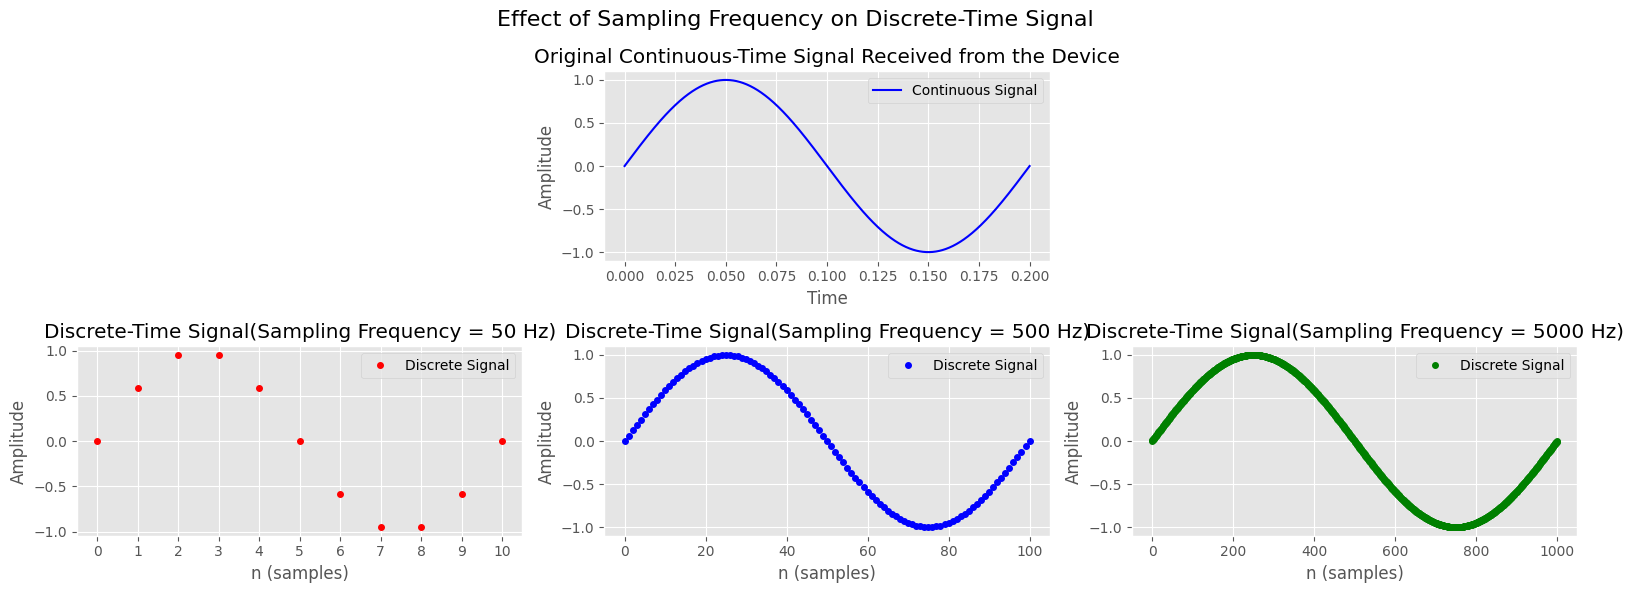

In [ ]:
# period of the continuous signal
T = 1 / 5  # 5 Hz frequency

#continuous function definition
t = np.linspace(0,0.2, 1000)
x_ct = np.sin(2 * np.pi * t / T)

#discrete function definition

# if the sampling frequency is 50 Hz ; T/10 = 0.02 seconds
n_50 = np.arange(0,11)  # 10 samples
x_dt_50 = np.sin(2 * np.pi * 0.1 * n) 

# if the sampling frequency is 100 Hz ; T/20 = 0.01 seconds
n_500 = np.arange(0, 21)  # 20 samples
x_dt_500 = np.sin(2 * np.pi * 0.05 * n_500)

# if the sampling frequency is 5000 Hz ; T/1000 = 0.0002 seconds
n_5000 = np.arange(0, 1001)  # 1000 samples
x_dt_5000 = np.sin(2 * np.pi * 0.001 * n_5000)

#plot both signals

plt.figure(figsize=(16,6))


plt.subplot(2, 3, 2)
plt.plot(t, x_ct, label='Continuous Signal', color='blue')
plt.title('Original CT Signal Received from the Device') 
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')

plt.subplot(2, 3, 4)
plt.plot(n_50, x_dt_50, 'ro', label='Discrete Signal', markersize=4)
plt.title('DT Signal(Sampling Frequency = 50 Hz)')
plt.xticks(n_50)  # Set x-ticks to match discrete samples
plt.xlabel('n (samples)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')

plt.subplot(2, 3, 5)
plt.plot(n_500, x_dt_500, 'bo', label='Discrete Signal', markersize=4)
plt.title('DT Signal(Sampling Frequency = 500 Hz)')
plt.xlabel('n (samples)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')

plt.subplot(2, 3, 6)
plt.plot(n_5000, x_dt_5000, 'go', label='Discrete Signal', markersize=4)
plt.title('DT Signal(Sampling Frequency = 5000 Hz)')
plt.xlabel('n (samples)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')

plt.suptitle('Effect of Sampling Frequency on Discrete-Time Signal', fontsize=16)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
style.use('ggplot')
plt.grid(True)
plt.tight_layout()
plt.show()

